In [8]:
import numpy as np
from problem_reductions.max_arb_to_ising import *   
from max_arb.exchange_rate_matrix import *
from max_arb.solution_analysis import *
import computing, results_annalysis

## Fetch the real exchange rate matrix from Binance

In [9]:
exchange_rate_matrix, coins = exchange_rate_matrix()

In [10]:
# exchange_rate_matrix = np.log(exchange_rate_matrix)
# ex_rate_flat = exchange_rate_matrix.flatten()
exchange_rate_matrix = exchange_rate_matrix[:,:]

In [14]:
n, _ = exchange_rate_matrix.shape
n**2

306916

In [4]:
np.set_printoptions(threshold=np.inf)
print(exchange_rate_matrix)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [5]:
# exchange_rate_matrix[np.isnan(exchange_rate_matrix)]
n, _ = np.shape(exchange_rate_matrix)
n**2

9

## Create an artificial (small), exchange rate matrix

In [4]:
# exchange_rate_matrix = np.array([[np.nan, 1.1, np.nan], [np.nan, np.nan, 1.0], [1.0, np.nan, np.nan]])


# Initialize a 9x9 numpy matrix
exchange_rate_matrix = np.ones((9,9))

# Let's say 1 unit of currency i can be exchanged for 1 unit of currency j, i!=j
# Fill the diagonal with 1.0 (since any currency's rate to itself is 1)
np.fill_diagonal(exchange_rate_matrix, 1.0)

# Define the fictive exchange rates
# From currency 1 to 2
exchange_rate_matrix[0][1] = 0.9
# From currency 2 to 3
exchange_rate_matrix[1][2] = 0.9
# And from currency 3 back to 1
exchange_rate_matrix[2][0] = 1.2


exchange_rate_matrix = np.log(exchange_rate_matrix)
exchange_rate_matrix[np.isnan(exchange_rate_matrix)] = 0
ex_rate_flat = exchange_rate_matrix.flatten()

In [29]:
J, H = max_arb_to_ising(exchange_rate_matrix, 0, 0)

In [30]:
J, H

(array([[ 0., -0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0., -0., ..., -0., -0., -0.],
        [ 0., -0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0., -0.,  0., ...,  0.,  0.,  0.],
        [ 0., -0.,  0., ...,  0.,  0.,  0.],
        [ 0., -0.,  0., ...,  0.,  0.,  0.]]),
 array([ 0.        , -0.01621731,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.01621731,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.07683797,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        

# Solve

In [31]:
states, energies, path = computing.compute_single_instance(instance_size=len(J), step=0.001, n_itterations=10000, n_cond_init=50, J=J, H=H, savetofile=False)

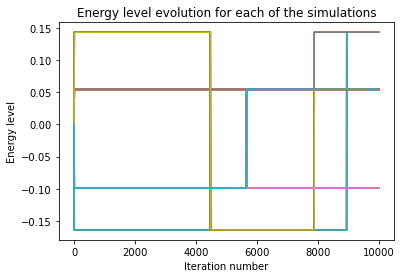

In [32]:
results_annalysis.plot_energies_evolution(energies)

In [43]:
_, spins, _= results_annalysis.extract_full_solution(states, energies)

In [44]:
X = 0.5 * (spins + 1)
# n = int(np.sqrt(len(X)))
# X = X.reshape(n, n)

In [45]:
X

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.])

In [46]:
check_valid_solution(X, exchange_rate_matrix)

ValueError: The trade sequence is not a circle. Increase coefficient lambda1 and retry

In [47]:
compute_theorical_proffit(X, exchange_rate_matrix)

0.972